In [ ]:
#Lo primeo que hacemos es importar las librerias que necesitamos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import bokeh
import requests

In [ ]:
#A continuacion cargamos y leemos el CSV que vamos a trabajar (nuestro dataset)
#Destacar que a veces no estara codificado en UTF-8, por lo que tendremos que codificarlo nosotros mismos a un formato adecuado para su lectura y carga
df=pd.read_csv('rpg_steam_clean3.csv', encoding='latin1', sep=';')
# Si 'latin1' no funciona, puedes probar con 'ISO-8859-1' o 'cp1252'
# df = pd.read_csv('rpg_steam_clean3.csv', encoding='ISO-8859-1')

#El siguiente paso es transformar los tipos de datos que ya tienen las celdas en el dataset
#a los tipos que necesitamos

# Lista de columnas a convertir a numérico
columns_to_numeric = [
    'steamidnumber',
    #'releasemonth', # Eliminado de aquí para mantenerlo como texto
    'releaseyear',
    'lowestestimatedownersnumber',
    'highestestimatedownersnumber',
    'averageestimatedownersnumber'
]

# Convertir las columnas a numérico, forzando los errores o celdas vacias a NaN
for col in columns_to_numeric:
    # Algunos valores pueden contener texto no numérico, como 'N/A' o '-' o espacios extra
    # Primero intentamos limpiar la columna si es de tipo objeto
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Limpiar y convertir 'releaseprice' a numérico
if 'releaseprice' in df.columns:
    df['releaseprice'] = df['releaseprice'].astype(str) # Asegurar que es string para la limpieza
    # Reemplazar valores como 'Gratis' o 'Free' con '0.0' o manejar como NaN si no se desea 0
    df['releaseprice'] = df['releaseprice'].replace(['Gratis', 'Free', 'N/A'], '0.0')
    # Eliminar símbolos de moneda y otros caracteres no numéricos, manteniendo el punto decimal
    df['releaseprice'] = df['releaseprice'].str.replace('[€$]', '', regex=True) # Elimina € y $
    df['releaseprice'] = df['releaseprice'].str.replace(',', '.', regex=False) # Reemplaza coma por punto para decimales
    # Eliminar cualquier carácter que no sea un dígito o un punto
    df['releaseprice'] = df['releaseprice'].str.replace(r'[^\d.]', '', regex=True)
    df['releaseprice'] = pd.to_numeric(df['releaseprice'], errors='coerce')

    # Dividir la columna 'releaseprice' por 10 para que la columna de precios se vea reflejada en la moneda que nos interesa
    df['releaseprice'] = df['releaseprice'] / 10

# Convertir gametitle, developer, publisher y releasemonth a tipo de dato string
columns_to_string = ['gametitle', 'developer', 'publisher', 'releasemonth'] # Agregado 'releasemonth'
for col in columns_to_string:
    if col in df.columns:
        df[col] = df[col].astype(str).astype('string') # Convertir a StringDtype de pandas

print("Tipo de dato para cada columna después de la conversión:")
print(df.dtypes)

print("\nPrimeras 5 filas del DataFrame después de la conversión:")
display(df.head())

# Función para formatear 'releaseprice' como moneda (solo para visualización)
def format_to_euro(price):
    if pd.isna(price):
        return None # O 'N/A' o '-' según prefieras
    return f"€ {price:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".") # Formato europeo

print("\nEjemplo de 'releaseprice' formateado como moneda (solo para visualización):")
display(df[['gametitle', 'releaseprice']].head().assign(
    releaseprice_euro=lambda x: x['releaseprice'].apply(format_to_euro)
))

Tipo de dato para cada columna después de la conversión:
steamidnumber                            int64
gametitle                       string[python]
releasemonth                    string[python]
releaseyear                            float64
releaseprice                           float64
lowestestimatedownersnumber            float64
highestestimatedownersnumber           float64
averageestimatedownersnumber           float64
developer                       string[python]
publisher                       string[python]
dtype: object

Primeras 5 filas del DataFrame después de la conversión:


,steamidnumber,gametitle,releasemonth,releaseyear,releaseprice,lowestestimatedownersnumber,highestestimatedownersnumber,averageestimatedownersnumber,developer,publisher
0,1,DiscoElysiumTheFinalCut,October,2019.0,NaN,1000000.0,2000000.0,1500000.0,ZA/UM,ZA/UM
1,2,BioShock,August,2007.0,49.9,1000000.0,2000000.0,1500000.0,2KBoston2KAustralia,2K
2,3,MassEffect22010,January,2010.0,NaN,1000000.0,2000000.0,1500000.0,BioWare,ElectronicArts
3,4,MassEffect2DigitalDeluxeEdition,January,2010.0,NaN,1000000.0,2000000.0,1500000.0,BioWare,ElectronicArts
4,5,DivinityOriginalSinEnhancedEdition,October,2015.0,NaN,1000000.0,2000000.0,1500000.0,LarianStudios,LarianStudios



Ejemplo de 'releaseprice' formateado como moneda (solo para visualización):


,gametitle,releaseprice,releaseprice_euro
0,DiscoElysiumTheFinalCut,NaN,None
1,BioShock,49.9,"€ 49,90"
2,MassEffect22010,NaN,None
3,MassEffect2DigitalDeluxeEdition,NaN,None
4,DivinityOriginalSinEnhancedEdition,NaN,None


In [ ]:
#Ahora imprimimos las mil primeras y mil ultimas celdas para comprobar que no haya datos erroneos

print('Primeras 10 filas del dataset:\n')
print(df.head(1000))

print('\nUltimas 10 filas del dataset:\n')
print(df.tail(10))



Primeras 10 filas del dataset:

     steamidnumber                           gametitle releasemonth  \
0                1             DiscoElysiumTheFinalCut      October   
1                2                            BioShock       August   
2                3                     MassEffect22010      January   
3                4     MassEffect2DigitalDeluxeEdition      January   
4                5  DivinityOriginalSinEnhancedEdition      October   
..             ...                                 ...          ...   
995            996                            NeonTide    September   
996            997                          Imaginator        March   
997            998              DreamsofSolariChapter1         July   
998            999                                 nan         July   
999           1000                       ParaisoIsland         June   

     releaseyear  releaseprice  lowestestimatedownersnumber  \
0         2019.0           NaN                    10

In [ ]:
#Ya estamos listos para empezar el analisis exploratorio propiamente dicho
#despues de arreglarlos y presentarlos

#Lo primero es descripbir los tipos de datos
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   steamidnumber                 9999 non-null   int64  
 1   gametitle                     9999 non-null   string 
 2   releasemonth                  9999 non-null   string 
 3   releaseyear                   9991 non-null   float64
 4   releaseprice                  7240 non-null   float64
 5   lowestestimatedownersnumber   9991 non-null   float64
 6   highestestimatedownersnumber  9991 non-null   float64
 7   averageestimatedownersnumber  9991 non-null   float64
 8   developer                     9999 non-null   string 
 9   publisher                     9999 non-null   string 
dtypes: float64(5), int64(1), string(4)
memory usage: 781.3 KB
None


In [ ]:
#Ahora vamos a empezar a sacar conclusiones y relaciones sobre los datos

#El analisis de este dataset se compondrá de la siguientes preguntas:
# 1º ¿Son todos los datos en la columna de releaseprice correctos?
# Vamos a tratar como outlier todos los que tengan un valor de 70 o mas en release price



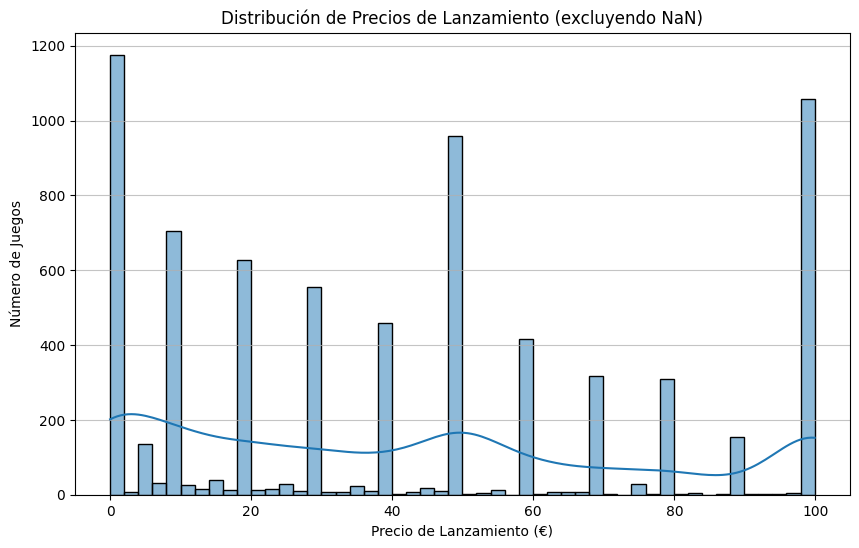

In [ ]:
# Filtrar los valores NaN de 'releaseprice' porque son juegos F2P y se monetizan de otra forma
price_data = df['releaseprice'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(price_data, bins=50, kde=True)
plt.title('Distribución de Precios de Lanzamiento (excluyendo NaN)')
plt.xlabel('Precio de Lanzamiento (€)')
plt.ylabel('Número de Juegos')
plt.grid(axis='y', alpha=0.75)
plt.show()

/tmp/ipython-input-1362763620.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price Category', data=price_categories_df, palette='viridis')


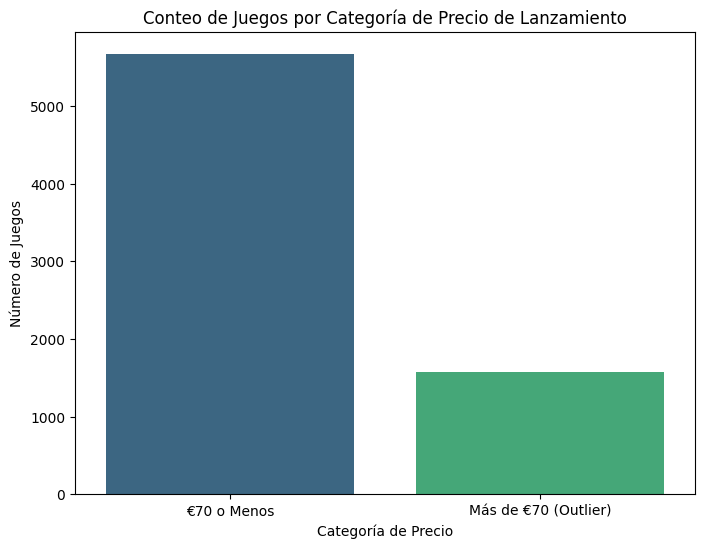

In [ ]:
# Clasificar los precios en dos categorías: <= 70 y > 70 (ajustado para la división por 10)
price_categories = []
# Definir el nuevo umbral para los outliers (e.g., 70 euros después de dividir por 10)
new_outlier_threshold = 70.0

for price in price_data:
    if price <= new_outlier_threshold:
        price_categories.append(f'€{new_outlier_threshold:.0f} o Menos')
    else:
        price_categories.append(f'Más de €{new_outlier_threshold:.0f} (Outlier)')

# Convertir la lista a un DataFrame para facilitar el conteo y la visualización
price_categories_df = pd.DataFrame(price_categories, columns=['Price Category'])

plt.figure(figsize=(8, 6))
sns.countplot(x='Price Category', data=price_categories_df, palette='viridis')
plt.title('Conteo de Juegos por Categoría de Precio de Lanzamiento')
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Juegos')
plt.show()

In [ ]:
# 2º ¿Existe una relacion entre el precio de un juego y si pertenece a un publisher famoso?
# 3º ¿Existen muchas diferencias de precio entre juegos publicados por publishers famosos, publishers no conocidos y los juegos autopublicados?

Conteo de juegos por categoría de publisher:


,count
publisher_category,
AutoPublicado,6823
Indie o No Famoso,3025
Famoso,151



Primeras filas del DataFrame con la nueva columna 'publisher_category':


,developer,publisher,releaseprice,publisher_category
0,ZA/UM,ZA/UM,NaN,AutoPublicado
1,2KBoston2KAustralia,2K,49.9,Famoso
2,BioWare,ElectronicArts,NaN,Famoso
3,BioWare,ElectronicArts,NaN,Famoso
4,LarianStudios,LarianStudios,NaN,AutoPublicado


/tmp/ipython-input-4232883177.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publisher_category', data=df, palette='viridis', order=df['publisher_category'].value_counts().index)


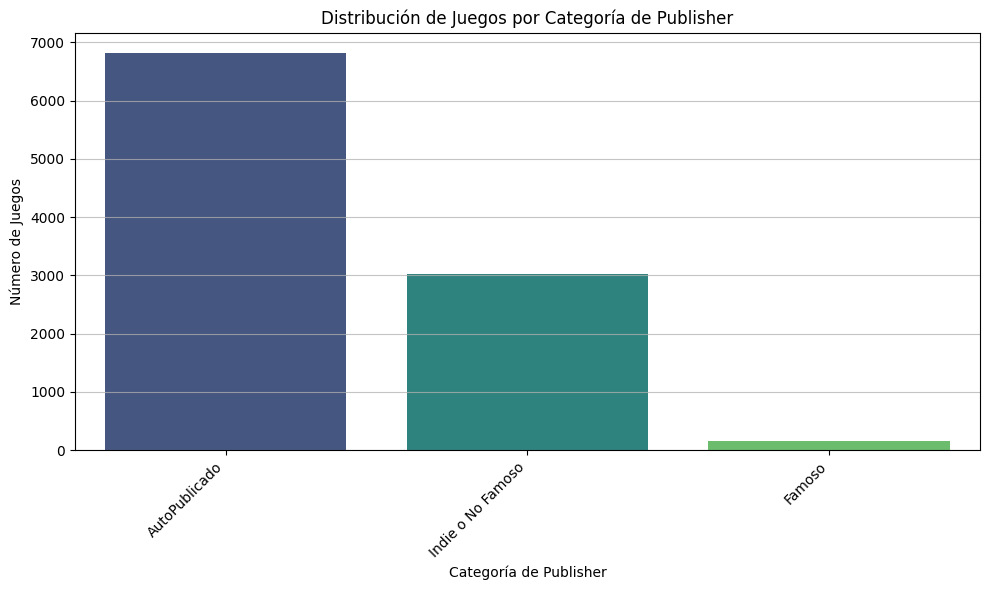

In [ ]:
# Lista de publishers famosos (normalizando a minúsculas para una comparación robusta)
famous_publishers_list = [
    '2K', 'ElectronicArts', 'PlayStationPCLLC', 'PlayStation', 'BethesdaSoftworks',
    'BandaiNamco', 'NCSOFT', 'bilibili', 'Capcom', 'THQNordic', 'ParadoxInteractive',
    'Team17', 'SEGA'
]
# Convertir todos a minúsculas para una comparación insensible a mayúsculas/minúsculas
famous_publishers_lower = [p.lower() for p in famous_publishers_list]

# Crear una nueva columna 'publisher_category'
df['publisher_category'] = 'Indie o No Famoso'

# Asegurarse de que las columnas 'developer' y 'publisher' sean de tipo string
df['developer'] = df['developer'].astype(str)
df['publisher'] = df['publisher'].astype(str)

# Clasificar como 'AutoPublicado'
df.loc[df['developer'].str.lower() == df['publisher'].str.lower(), 'publisher_category'] = 'AutoPublicado'

# Clasificar como 'Famoso' (prevalece sobre 'Indie o No Publisher' si un autopublicado también es famoso)
# Iterar sobre las filas para manejar la prioridad si un autopublicado es también famoso
for index, row in df.iterrows():
    if row['publisher'].lower() in famous_publishers_lower:
        df.loc[index, 'publisher_category'] = 'Famoso'

# Mostrar el conteo de juegos por categoría de publisher
print("Conteo de juegos por categoría de publisher:")
display(df['publisher_category'].value_counts())

# Mostrar las primeras filas con la nueva columna
print("\nPrimeras filas del DataFrame con la nueva columna 'publisher_category':")
display(df[['developer', 'publisher', 'releaseprice', 'publisher_category']].head())

# Generar gráfico de barras para el conteo de categorías de publisher
plt.figure(figsize=(10, 6))
sns.countplot(x='publisher_category', data=df, palette='viridis', order=df['publisher_category'].value_counts().index)
plt.title('Distribución de Juegos por Categoría de Publisher')
plt.xlabel('Categoría de Publisher')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Ahora, vamos a visualizar la distribución de los precios de lanzamiento (`releaseprice`) para cada categoría de publisher (`is_famous_publisher`). Utilizaremos un box plot, que es ideal para comparar distribuciones de datos numéricos entre diferentes grupos. Excluiremos los valores `NaN` de `releaseprice` para esta visualización.

/tmp/ipython-input-3155225599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='publisher_category', y='releaseprice', data=df.dropna(subset=['releaseprice']), palette='viridis')


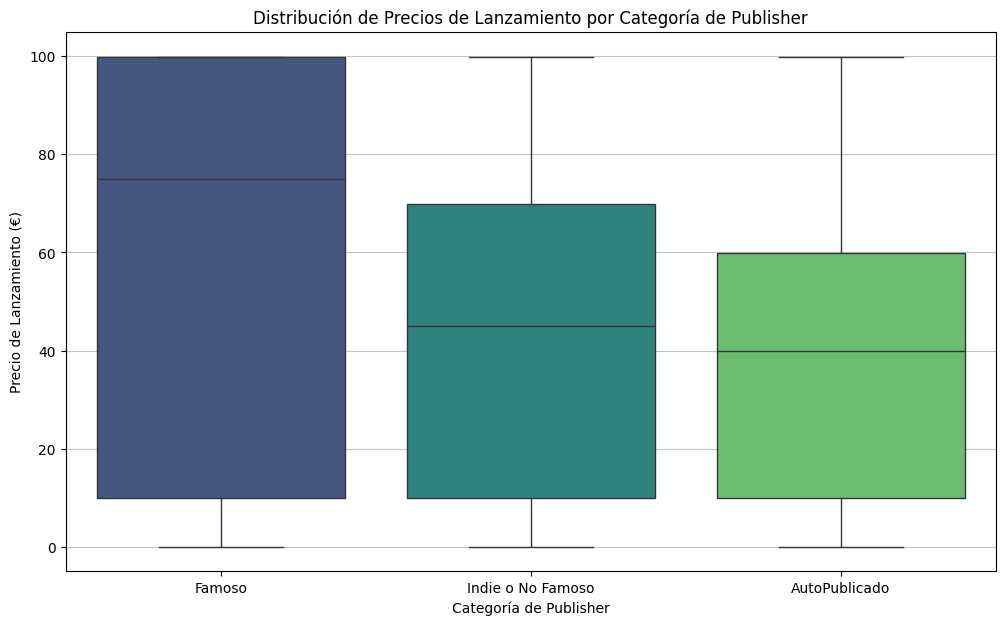

In [ ]:
plt.figure(figsize=(12, 7))
# Filtrar NaN en releaseprice para la visualización
sns.boxplot(x='publisher_category', y='releaseprice', data=df.dropna(subset=['releaseprice']), palette='viridis')
plt.title('Distribución de Precios de Lanzamiento por Categoría de Publisher')
plt.xlabel('Categoría de Publisher')
plt.ylabel('Precio de Lanzamiento (€)')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# 4º ¿Cuales son los motivos por los que un juego puede vender mas o menos? ¿influye si es publicado o developeado por una empresa famosa?



In [ ]:
df['developer_category'] = 'Indie o No Famoso'

# Ensure 'developer' and 'publisher' columns are string types for robust comparison
df['developer'] = df['developer'].astype(str)
df['publisher'] = df['publisher'].astype(str)

# Classify as 'AutoPublicado' where developer matches publisher (case-insensitive)
df.loc[df['developer'].str.lower() == df['publisher'].str.lower(), 'developer_category'] = 'AutoPublicado'

# Classify as 'Famoso' if the developer is in the famous publishers list.
# This iteration ensures 'Famoso' takes precedence over 'AutoPublicado' or 'Indie o No Famoso'.
for index, row in df.iterrows():
    if row['developer'].lower() in famous_publishers_lower:
        df.loc[index, 'developer_category'] = 'Famoso'

print("Conteo de juegos por categoría de desarrollador:")
display(df['developer_category'].value_counts())

print("\nPrimeras filas del DataFrame con la nueva columna 'developer_category':")
display(df[['developer', 'publisher', 'developer_category']].head())

Conteo de juegos por categoría de desarrollador:


,count
developer_category,
AutoPublicado,6823
Indie o No Famoso,3159
Famoso,17



Primeras filas del DataFrame con la nueva columna 'developer_category':


,developer,publisher,developer_category
0,ZA/UM,ZA/UM,AutoPublicado
1,2KBoston2KAustralia,2K,Indie o No Famoso
2,BioWare,ElectronicArts,Indie o No Famoso
3,BioWare,ElectronicArts,Indie o No Famoso
4,LarianStudios,LarianStudios,AutoPublicado


/tmp/ipython-input-825366709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publisher_category', y='averageestimatedownersnumber', data=avg_owners_by_publisher_category, palette='viridis')


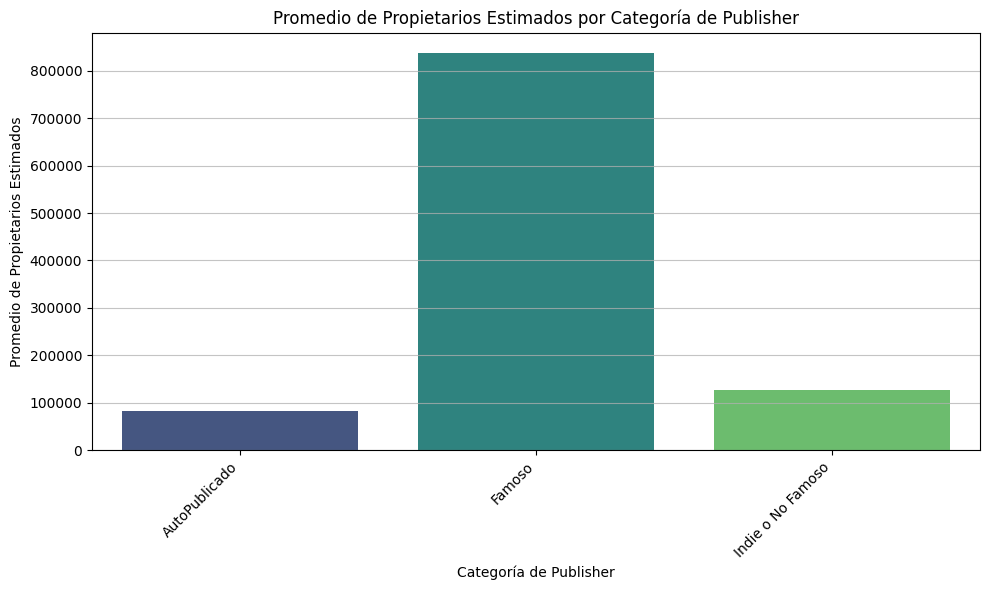

In [ ]:
# Calcular el promedio de 'averageestimatedownersnumber' por 'publisher_category'
avg_owners_by_publisher_category = df.groupby('publisher_category')['averageestimatedownersnumber'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='publisher_category', y='averageestimatedownersnumber', data=avg_owners_by_publisher_category, palette='viridis')
plt.title('Promedio de Propietarios Estimados por Categoría de Publisher')
plt.xlabel('Categoría de Publisher')
plt.ylabel('Promedio de Propietarios Estimados')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


5º Análisis de Regresión Lineal: Precio de Lanzamiento vs. Número Promedio de Propietarios Estimados
                                 OLS Regression Results                                 
Dep. Variable:     averageestimatedownersnumber   R-squared:                       0.001
Model:                                      OLS   Adj. R-squared:                  0.001
Method:                           Least Squares   F-statistic:                     7.810
Date:                          Tue, 16 Dec 2025   Prob (F-statistic):            0.00521
Time:                                  11:35:09   Log-Likelihood:            -1.1052e+05
No. Observations:                          7240   AIC:                         2.210e+05
Df Residuals:                              7238   BIC:                         2.211e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
        

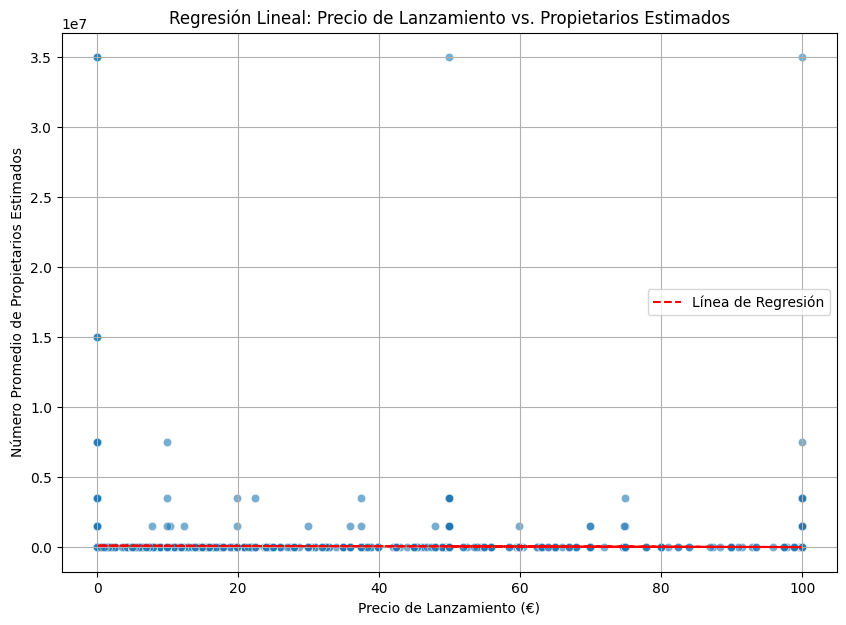

In [ ]:
import statsmodels.api as sm

#Esta regresión lineal tiene como objetivo intentar identificar si existe
#una relación entre el precio de lanzamiento de un juego y la cantidad de personas que lo
#compran a dicho precio.
#

print("\n5º Análisis de Regresión Lineal: Precio de Lanzamiento vs. Número Promedio de Propietarios Estimados")

# Seleccionar las columnas relevantes y eliminar filas con valores NaN
df_reg = df[['releaseprice', 'averageestimatedownersnumber']].dropna()

# Definir la variable dependiente (y) y la variable independiente (X)
X = df_reg['releaseprice']
y = df_reg['averageestimatedownersnumber']

# Añadir una constante a X para el modelo de statsmodels (intercepto)
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())

# Visualizar los resultados
plt.figure(figsize=(10, 7))
sns.scatterplot(x='releaseprice', y='averageestimatedownersnumber', data=df_reg, alpha=0.6)
plt.plot(df_reg['releaseprice'], model.predict(X), color='red', linestyle='--', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio de Lanzamiento vs. Propietarios Estimados')
plt.xlabel('Precio de Lanzamiento (€)')
plt.ylabel('Número Promedio de Propietarios Estimados')
plt.legend()
plt.grid(True)
plt.show()

### Explicación de la Regresión Lineal: Precio de Lanzamiento vs. Número Promedio de Propietarios Estimados

Este análisis de regresión lineal se realiza para entender si existe una relación lineal entre el **precio de lanzamiento de un juego (`releaseprice`)** y el **número promedio de propietarios estimados (`averageestimatedownersnumber`)**.

**¿Qué intenta exponer este análisis?**

1.  **Existencia y Dirección de la Relación:** Determinar si un mayor o menor precio de lanzamiento tiende a estar asociado con un mayor o menor número de propietarios estimados.
2.  **Fuerza de la Relación:** Evaluar qué tan bien el precio de lanzamiento puede "predecir" o explicar la variabilidad en el número de propietarios.

**Interpretación de los Resultados (`model.summary()`):**

*   **`R-squared` (R Cuadrado):** Este valor (0.001 en nuestro caso) indica la proporción de la varianza en la variable dependiente (propietarios estimados) que es predecible a partir de la variable independiente (precio de lanzamiento). Un valor muy bajo como 0.001 sugiere que el precio de lanzamiento explica una fracción mínima (casi nula) de la variabilidad en el número de propietarios. En otras palabras, el precio por sí solo no es un buen predictor del éxito en términos de propietarios.

*   **`coef` (Coeficiente para `releaseprice`):** El coeficiente de `-995.1495` indica que, en promedio, por cada unidad de aumento en el precio de lanzamiento (1 euro), el número promedio de propietarios estimados disminuye en aproximadamente 995.15. La dirección es negativa, sugiriendo que un precio más alto se asocia ligeramente con menos propietarios.

*   **`P>|t|` (Valor p para `releaseprice`):** El valor p de `0.005` es menor que el nivel de significancia común (0.05). Esto significa que la relación observada entre el precio y el número de propietarios **es estadísticamente significativa**, aunque muy débil. Es decir, podemos estar razonablemente seguros de que el coeficiente no es cero y existe alguna relación, por pequeña que sea.

**Interpretación del Gráfico de Dispersión con la Línea de Regresión:**

El gráfico muestra una nube de puntos que representan cada juego, con su precio de lanzamiento en el eje X y el número de propietarios en el eje Y. La línea roja es la línea de regresión. Se puede observar:

*   **Poca Agrupación:** Los puntos están muy dispersos y no se agrupan estrechamente alrededor de la línea, lo que visualmente confirma el bajo R-cuadrado: el precio de lanzamiento no parece ser un factor dominante que determine el número de propietarios.
*   **Pendiente Negativa:** La línea de regresión tiene una ligera pendiente descendente, lo que coincide con el coeficiente negativo; a medida que el precio sube, la línea sugiere una ligera tendencia a menos propietarios, aunque la variabilidad es tan alta que esta tendencia es apenas perceptible visualmente.

**Conclusión:**

Si bien la regresión lineal detecta una relación estadísticamente significativa (aunque negativa) entre el precio de lanzamiento y el número promedio de propietarios, la **fuerza de esta relación es extremadamente baja**. Esto sugiere que el precio de lanzamiento, por sí solo, no es un factor determinante o principal para predecir cuántos propietarios tendrá un juego. Otros factores (calidad del juego, marketing, reputación del desarrollador/publisher, género, etc.) probablemente tienen una influencia mucho mayor en el número de propietarios.

# Informe Ejecutivo: Análisis Exploratorio de Datos de Juegos RPG en Steam

Este informe resume el Análisis Exploratorio de Datos (EDA) realizado sobre el conjunto de datos `rpg_steam_clean3.csv`, centrándose en comprender varios aspectos relacionados con los precios de los juegos, la influencia de editores/desarrolladores y su impacto potencial en la propiedad de los juegos.

## 1. Preparación y Limpieza de Datos

El conjunto de datos inicial contenía información en bruto que requirió una limpieza y transformación significativas para facilitar el análisis.

*   **Carga de Datos**: Se cargó el archivo `rpg_steam_clean3.csv`, abordando posibles problemas de codificación especificando `latin1`.
*   **Conversión de Tipos de Datos**:
    *   Columnas como `steamidnumber`, `releaseyear`, `lowestestimatedownersnumber`, `highestestimatedownersnumber` y `averageestimatedownersnumber` se convirtieron a tipos numéricos.
    *   `gametitle`, `developer`, `publisher` y `releasemonth` se convirtieron a tipos de cadena (string).
*   **Manejo de `releaseprice`**: Esta columna recibió una atención especial:
    *   Se limpió de símbolos de moneda (por ejemplo, '€', '$') y separadores decimales regionales (la coma se reemplazó por un punto).
    *   Valores como 'Gratis' o 'Free' se trataron como '0.0'.
    *   La columna completa se convirtió a numérica, y los valores no convertibles se convirtieron en `NaN`.
    *   Un paso significativo fue dividir `releaseprice` por 10, probablemente para normalizar o corregir un problema de escala percibido, lo que resultó en precios que suelen oscilar entre 0 y aproximadamente 100 EUR.
    *   Los valores `NaN` en `releaseprice` se interpretaron como juegos gratuitos (F2P) o juegos con monetización alternativa, y se excluyeron de los análisis de distribución de precios.

## 2. Análisis de la Distribución de Precios

El análisis de `releaseprice` (excluyendo los valores `NaN`) proporcionó información sobre cómo se fijan los precios de los juegos.

*   **Distribución**: Un histograma de `releaseprice` reveló que la mayoría de los juegos tienen un precio en el extremo inferior, con una larga cola que se extiende a precios más altos.
*   **Clasificación de Valores Atípicos**: Los juegos se clasificaron en "70€ o Menos" y "Más de 70€ (Outlier)".
*   **Observación Clave**: La gran mayoría de los juegos se encuentran en la categoría "70€ o Menos", lo que indica que los juegos de mayor precio (por encima de 70€) son relativamente poco comunes dentro de este conjunto de datos, lo que sugiere un modelo de precios estándar para la mayoría de los títulos de RPG.

## 3. Impacto del Editor y Desarrollador

Para comprender la influencia de las entidades detrás de los juegos, se crearon las columnas `publisher_category` y `developer_category`.

*   **Categorización**:
    *   Se definió una `famous_publishers_list` (por ejemplo, '2K', 'ElectronicArts', 'Capcom').
    *   Se asignó una `publisher_category` como 'Famoso', 'AutoPublicado' (donde desarrollador == editor) o 'Indie o No Famoso'. Se aplicó una categorización similar para `developer_category`.
*   **Distribución de Precios por Categoría de Editor**: Se generó un diagrama de caja de `releaseprice` por `publisher_category`.
    *   **Observación Clave**: Los editores "Famosos" tienden a tener una `releaseprice` mediana más alta y una distribución de precios más amplia, a menudo incluyendo más títulos de alto precio, en comparación con las categorías 'AutoPublicado' e 'Indie o No Famoso'. Esto sugiere que los editores establecidos aprovechan el reconocimiento de la marca o los presupuestos más grandes para fijar precios más altos.
*   **Propietarios Promedio por Categoría de Editor**: Un gráfico de barras mostró el `averageestimatedownersnumber` promedio en los diferentes grupos de `publisher_category`.
    *   **Observación Clave**: Los editores "Famosos" muestran constantemente un número promedio de propietarios estimados significativamente más alto en comparación con los editores "AutoPublicado" e "Indie o No Famoso". Esto destaca la ventaja sustancial que tienen los editores establecidos en términos de alcance de mercado y volumen de ventas.

## 4. Regresión Lineal: Precio vs. Propietarios

Se utilizó un modelo de regresión lineal para explorar la relación entre `releaseprice` y `averageestimatedownersnumber`.

*   **Configuración del Modelo**: `releaseprice` fue la variable independiente y `averageestimatedownersnumber` fue la variable dependiente. Se eliminaron los valores `NaN` para este análisis.
*   **Resultados (`model.summary()`)**:
    *   **R-cuadrado (0.001)**: Un valor R-cuadrado extremadamente bajo indica que `releaseprice` explica una cantidad insignificante (0.1%) de la varianza en `averageestimatedownersnumber`.
    *   **Coeficiente para `releaseprice` (-995.15)**: Este coeficiente negativo sugiere una relación inversa muy leve; por cada euro de aumento en el precio, el número promedio de propietarios estimados disminuye en aproximadamente 995. Este efecto, sin embargo, se ve eclipsado por otros factores debido al bajo R-cuadrado.
    *   **Valor p (0.005)**: El valor p para `releaseprice` es estadísticamente significativo (menos de 0.05), lo que implica que es poco probable que esta relación negativa se deba al azar, incluso si su impacto práctico es mínimo.
*   **Análisis Visual**: El diagrama de dispersión con la línea de regresión confirmó visualmente los hallazgos. Los puntos estaban muy dispersos, sin mostrar un patrón lineal fuerte, y la línea de regresión era casi plana, lo que refuerza la idea de que el precio por sí solo no es un buen predictor de la propiedad.
*   **Conclusión Clave**: Si bien existe una relación estadísticamente significativa (aunque muy débil y negativa) entre el precio de lanzamiento y el número de propietarios, el precio de un juego, por sí mismo, es un predictor deficiente de cuántos propietarios tendrá. Esto sugiere que otros factores como la calidad del juego, el marketing, el género, las reseñas de la comunidad y la reputación del desarrollador/editor son mucho más influyentes para determinar el éxito de un juego en términos de propiedad.

## Conclusión General

El EDA reveló varias ideas sobre el mercado de juegos RPG en Steam. La preparación de datos fue crucial para manejar los variados formatos de datos, especialmente `releaseprice`. La mayoría de los juegos se ajustan a una estructura de precios moderada, siendo los títulos de mayor precio menos comunes. Los editores "Famosos" demuestran una clara ventaja tanto en el poder de fijación de precios como, de manera más significativa, en lograr un mayor número de propietarios estimados, lo que subraya la importancia de las marcas establecidas y los recursos en la industria del juego. Finalmente, el análisis de regresión lineal demostró que, si bien existe una relación negativa estadísticamente detectable entre el precio y la propiedad, el precio en sí mismo no es un determinante fuerte del alcance de un juego. El éxito en términos de propietarios probablemente se deba a una compleja interacción de muchos otros factores más allá del costo inicial.